In [63]:
# import relevant libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# read csv file and display the first 10 rows
df = pd.read_csv("mariokart.csv")
df.head(10)

,id,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels,title
0,150377422259,3,20,new,0.99,4.00,51.55,standard,1580,yes,1,~~ Wii MARIO KART &amp; WHEEL ~ NINTENDO Wii ~...
1,260483376854,7,13,used,0.99,3.99,37.04,firstClass,365,yes,1,Mariokart Wii Nintendo with wheel - Mario Kart...
2,320432342985,3,16,new,0.99,3.50,45.50,firstClass,998,no,1,Mario Kart Wii (Wii)
3,280405224677,3,18,new,0.99,0.00,44.00,standard,7,yes,1,Brand New Mario Kart Wii Comes with Wheel. Fre...
4,170392227765,1,20,new,0.01,0.00,71.00,media,820,yes,2,BRAND NEW NINTENDO 1 WII MARIO KART WITH 2 WHE...
5,360195157625,3,19,new,0.99,4.00,45.00,standard,270144,yes,0,Mario Kart Wii (GAME ONLY/NO WHEEL) - Nintendo...
6,120477729093,1,13,used,0.01,0.00,37.02,standard,7284,yes,0,Mario Kart Wii (Wii) Nintendo Wii game *--WOW ...
7,300355501482,1,15,new,1.00,2.99,53.99,upsGround,4858,yes,2,BRAND NEW NINTENDO MARIO KART WITH 2 WHEELS
8,200392065459,3,29,used,0.99,4.00,47.00,priority,27,yes,1,Wii game Mario Kart in box with 1 wheel Fast S...
9,330364163424,7,8,used,19.99,4.00,50.00,firstClass,201,no,1,Nintendo Wii : Mario Kart Wii w/ Wii Wheel (20...


In [64]:
# Display the identified outliers in the dataset (total_pr)
# The df.iloc function is used to select specific rows from the dataframe

print("*"*30, "Outlier 1", "*"*30)
print(df.iloc[19])
print("_"*100)
print("*"*30, "Outlier 2", "*"*30)
print(df.iloc[64])

# The df.drop function is then used to remove these rows from the dataframe. (ran only once)
df = df.drop([19, 64])

# confirm that the outliers have been removed (from 143 to 141 rows)
len(df)

****************************** Outlier 1 ******************************
id                                                  110439174663
duration                                                       7
n_bids                                                        22
cond                                                        used
start_pr                                                     1.0
ship_pr                                                    25.51
total_pr                                                  326.51
ship_sp                                                   parcel
seller_rate                                                  115
stock_photo                                                   no
wheels                                                         2
title          Nintedo Wii Console Bundle Guitar Hero 5 Mario...
Name: 19, dtype: object
____________________________________________________________________________________________________
***********************

141

In [65]:
# remove irrelevant columns - we will only need the 'seller_rate' and "total_pr" columns
df = df[['seller_rate','total_pr']]

# rename columns for better readability
df = df.rename(
    columns={'seller_rate': 'Net Positive Seller Ratings', 'total_pr': 'Total Price for a Mario Kart auction listing'})

df

,Net Positive Seller Ratings,Total Price for a Mario Kart auction listing
0,1580,51.55
1,365,37.04
2,998,45.50
3,7,44.00
4,820,71.00
...,...,...
138,7284,39.51
139,121,52.00
140,251,47.70
141,41,38.76


In [66]:
# descrptive sttatistics for the dataset
print("\n", df.describe(), "\n")


def list_medianmode(column):

    # Compute the median of the column
    print(column)
    med = (df[column]).median()
    print(" - Median = ", med)

    # Compute the mode of the column
    # the mode function returns a tuple with two arrays: the first array contains the modes, and the second array contains the counts for each mode.
    mod = stats.mode(df[column])
    print(" - Mode = ", mod,"\n")

list_medianmode('Net Positive Seller Ratings')
list_medianmode('Total Price for a Mario Kart auction listing')



        Net Positive Seller Ratings  \
count                   141.000000   
mean                  16122.822695   
std                   52174.553337   
min                       0.000000   
25%                     116.000000   
50%                     820.000000   
75%                    4858.000000   
max                  270144.000000   

       Total Price for a Mario Kart auction listing  
count                                    141.000000  
mean                                      47.431915  
std                                        9.113651  
min                                       28.980000  
25%                                       41.000000  
50%                                       46.030000  
75%                                       53.990000  
max                                       75.000000   

Net Positive Seller Ratings
 - Median =  820.0
 - Mode =  ModeResult(mode=array([4858]), count=array([23])) 

Total Price for a Mario Kart auction listing
 - Median = 

/var/folders/5c/74zjnt5j7tz5srqtplhlybsh0000gn/T/ipykernel_1416/2593310463.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mod = stats.mode(df[column])
/var/folders/5c/74zjnt5j7tz5srqtplhlybsh0000gn/T/ipykernel_1416/2593310463.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

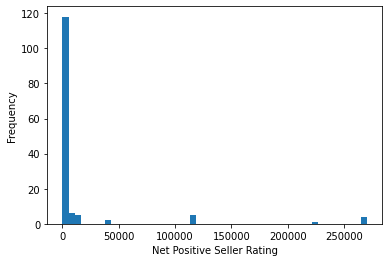

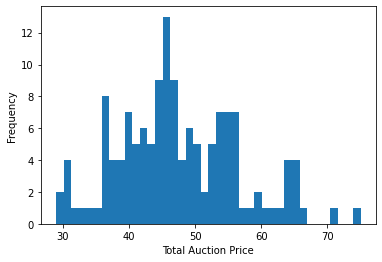

In [75]:
# plot a histogram for seller_rate
plt.hist(df['Net Positive Seller Ratings'], bins=50)

# add x and y labels
plt.xlabel('Net Positive Seller Rating')
plt.ylabel('Frequency')

# show the plot
plt.show()

# plot a histogram for total_pr
plt.hist(df['Total Price for a Mario Kart auction listing'], bins=40)

# add x and y labels
plt.xlabel('Total Auction Price')
plt.ylabel('Frequency')

# show the plot
plt.show()


In [68]:
# A seller_rate is high when it is > 1000, and low when it is < 1000
# Create two new dataframes to represent the 'high' and 'low' seller_rates
df_high = df[df['Net Positive Seller Ratings'] > 1000]
df_low = df[df['Net Positive Seller Ratings'] < 1000]

In [69]:

# Calculate descriptive statistics for the Mario Kart auction prices from Sellers with High Reviews
print("Sellers with High Ratings")

# Calculate and print the descriptive statistics of the high review seller prices
describe_high = df_high['Total Price for a Mario Kart auction listing'].describe()
median_high = df_high['Total Price for a Mario Kart auction listing'].median()
mode_high = stats.mode(df_high['Total Price for a Mario Kart auction listing'])
range_high = df_high['Total Price for a Mario Kart auction listing'].max() - df_high['Total Price for a Mario Kart auction listing'].min()

print(describe_high)
print("Median = ", median_high)
print("Mode = ", mode_high)
print("Range = ", range_high)


print("_"*40)

# Calculate descriptive statistics for the Mario Kart auction prices from Sellers with Low Reviews
print("Sellers with Low Ratings")

# Calculate and print the mean, median, and mode of the low review seller prices
describe_low = df_low['Total Price for a Mario Kart auction listing'].describe()
median_low = df_low['Total Price for a Mario Kart auction listing'].median()
mode_low = stats.mode(df_low['Total Price for a Mario Kart auction listing'])
range_low = df_low['Total Price for a Mario Kart auction listing'].max() - df_low['Total Price for a Mario Kart auction listing'].min()

print("Mean = ", describe_low)
print("Median = ", median_low)
print("Mode = ", mode_low)
print("Range = ", range_low)

Sellers with High Ratings
count    60.000000
mean     48.345000
std       9.981422
min      28.980000
25%      40.550000
50%      47.500000
75%      54.630000
max      75.000000
Name: Total Price for a Mario Kart auction listing, dtype: float64
Median =  47.5
Mode =  ModeResult(mode=array([53.99]), count=array([4]))
Range =  46.019999999999996
________________________________________
Sellers with Low Ratings
Mean =  count    81.000000
mean     46.755556
std       8.413556
min      31.000000
25%      41.950000
50%      46.000000
75%      50.000000
max      71.000000
Name: Total Price for a Mario Kart auction listing, dtype: float64
Median =  46.0
Mode =  ModeResult(mode=array([46.]), count=array([6]))
Range =  40.0


/var/folders/5c/74zjnt5j7tz5srqtplhlybsh0000gn/T/ipykernel_1416/836328845.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_high = stats.mode(df_high['Total Price for a Mario Kart auction listing'])
/var/folders/5c/74zjnt5j7tz5srqtplhlybsh0000gn/T/ipykernel_1416/836328845.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

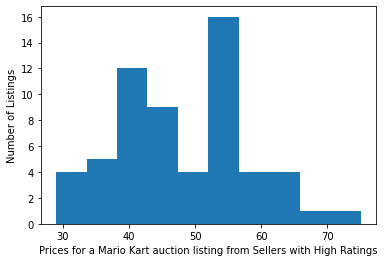

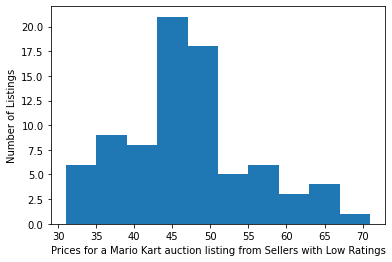

In [70]:
import matplotlib.pyplot as plt

# plot a histogram for the high review seller prices
plt.hist(df_high['Total Price for a Mario Kart auction listing'], bins=10)

# add x and y labels
plt.xlabel('Prices for a Mario Kart auction listing from Sellers with High Ratings')
plt.ylabel('Number of Listings')

# show the plot
plt.show()


# plot a histogram for the low review seller prices
plt.hist(df_low['Total Price for a Mario Kart auction listing'], bins=10)

# add x and y labels
plt.xlabel('Prices for a Mario Kart auction listing from Sellers with Low Ratings')
plt.ylabel('Number of Listings')

# show the plot
plt.show()


In [71]:
# Statistical Significance Tests

# Calculate mean and standard deviation for each subgroup
# calculate the mean total price for auctions with high seller ratings
mean_high = df_high["Total Price for a Mario Kart auction listing"].mean()
# calculate the standard deviation of total prices for auctions with high seller ratings
std_high = df_high["Total Price for a Mario Kart auction listing"].std()
# calculate the mean total price for auctions with low seller ratings
mean_low = df_low["Total Price for a Mario Kart auction listing"].mean()
# calculate the standard deviation of total prices for auctions with low seller ratings
std_low = df_low["Total Price for a Mario Kart auction listing"].std()

# Calculate difference of means and standard error
# calculate the difference in mean total prices between the two subgroups
diff_means = mean_high - mean_low
# calculate the standard error of the difference of means
std_error = np.sqrt((std_high**2 / len(df_high)) + (std_low**2 / len(df_low)))

# Calculate t-score and p-value
# calculate the t-score using the difference of means and standard error
t_score = diff_means / std_error
# calculate the p-value using the t-score and degrees of freedom
p_value = stats.t.sf(np.abs(t_score), len(df_high) + len(df_low) - 2)*2

# Print t-score and p-value
print("T-score: ", round(t_score,2))
print("P-value: ", round(p_value,2))


T-score:  1.0
P-value:  0.32


In [72]:
# Statistical Significance Tests

# # Calculated Pooled Standard Deviation

n1 = len(df_high)  # number of auctions with high seller ratings
# number of auctions with low seller ratings
# standard deviation of total prices for auctions with high seller ratings
n2 = len(df_low)
s1 = df_high["Total Price for a Mario Kart auction listing"].std()
# standard deviation of total prices for auctions with low seller ratings
s2 = df_low["Total Price for a Mario Kart auction listing"].std()
s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))  # pooled standard deviation

# Calculate Cohen's d
# difference of means for total prices of auctions with high and low seller ratings
diff_means = df_high["Total Price for a Mario Kart auction listing"].mean() - df_low["Total Price for a Mario Kart auction listing"].mean()

# calculate Cohen's d using the difference of means and pooled standard deviation
d = diff_means / s_pooled

# Print Cohen's d
print("Cohen's d: ", round(d,2))

Cohen's d:  0.17


In [73]:
#Set the confidence level
conf_level = 0.95 # set the confidence level to 95%

# Calculate the margin of error
moe_high = stats.norm.ppf(1 - (1 - conf_level) / 2) * std_high / np.sqrt(len(df_high)) # calculate the margin of error for auctions with high seller ratings
moe_low = stats.norm.ppf(1 - (1 - conf_level) / 2) * std_low / np.sqrt(len(df_low)) # calculate the margin of error for auctions with low seller ratings

# Calculate the confidence intervals
ci_high = [mean_high - moe_high, mean_high + moe_high] # calculate the confidence interval for auctions with high seller ratings
ci_low = [mean_low - moe_low, mean_low + moe_low] # calculate the confidence interval for auctions with low seller ratings

# Print the confidence intervals
print("95% Confidence Interval for auctions with high seller ratings: ", ci_high)
print("95% Confidence Interval for auctions with low seller ratings: ", ci_low)

95% Confidence Interval for auctions with high seller ratings:  [45.81939813450821, 50.870601865491814]
95% Confidence Interval for auctions with low seller ratings:  [44.923303754424495, 48.587807356686625]
